Important genes

SOX9, ASCL1, GATA2

In [147]:
# STEP 1: Importing Necessary Modules

import os
import numpy as np
import pandas as pd
from scipy import stats
import random
import pickle
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

In [220]:
#Pathway
FIGURE_FOLDERNAME = "/home/linl5/project/SCLC/figures/compare"

In [133]:
# METHOD DEFINING FOR NETWORK ANALYSIS 3

# @input: the file path to the regulon.p file for the specific dataset, state, and cell fraction
# @output: the dataframe object with all the needed information from regulon.p file with added rank normalization info for each genes by regulons
# this method converts regulon .p information to a dataframe for better handling and reading while also doing rank normalization for all the genes in each regulons
def Regulon_read(REGULONS_FNAME):
    #Reading file
    with open(REGULONS_FNAME, 'rb') as f:
        regulons = pickle.load(f)
    print("SUCCESSFUL READING OF:", REGULONS_FNAME)
    
    # Initialize an empty list to store the rows of the new DataFrame
    rows = []

    # Loop through each regulon object in the list
    for regulon in regulons:
        regulon_name = regulon.name
        transcription_factor = regulon.transcription_factor
        context = regulon.context
        score = regulon.score
        orthologous_identity = regulon.orthologous_identity
        similarity_qvalue = regulon.similarity_qvalue
        annotation = regulon.annotation
        nes = regulon.nes

        #Performing rank normalization: from histogram values appear to be postively skewed for most regulons
        values = list(regulon.gene2weight.values())
        rank_normalized_weight = stats.rankdata(values)/(len(values) + 1)
        count = 0
        # Loop through each gene in the regulon and extract gene-target pairs
        for gene, weight in regulon.gene2weight.items():
            row = {
                'Regulon_Name': regulon_name,
                'Transcription_Factor': transcription_factor,
                'Context': context,
                'Target_Gene': gene,
                'Weight': weight,
                'Scores': score,
                'nes': nes,
                'orthologous_identity': orthologous_identity,
                'similarity_qvalue': similarity_qvalue, 
                'annotation': annotation,
                'Rank_Norm' : rank_normalized_weight[count]
            }
            rows.append(row)
            count += 1

    # Create a new DataFrame from the list of rows
    regulon_df = pd.DataFrame(rows)
    return regulon_df

In [134]:
# STEP 2: Defining first dataset file for comparison

#FILE 1 defining
DATASET_ID1 = "lx108"
state1 = "UUUU"
frac_cells1 = 0.2
DATA_FOLDERNAME = "/home/linl5/project/SCLC/data/{}".format(DATASET_ID1)
REGULONS_FNAME = os.path.join(DATA_FOLDERNAME, '{}.{}.{}.regulons.p'.format(DATASET_ID1, state1, frac_cells1))

#File 1 regulon df
regulon1 = Regulon_read(REGULONS_FNAME)
regulon1.head(10)

SUCCESSFUL READING OF: /home/linl5/project/SCLC/data/lx108/lx108.UUUU.0.2.regulons.p


,Regulon_Name,Transcription_Factor,Context,Target_Gene,Weight,Scores,nes,orthologous_identity,similarity_qvalue,annotation,Rank_Norm
0,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",FTL,2.329979,3.697575,0.0,0.0,0.0,,0.555556
1,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",INSM1,1.836974,3.697575,0.0,0.0,0.0,,0.416667
2,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",EGR2,6.042445,3.697575,0.0,0.0,0.0,,0.888889
3,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",HES1,1.502803,3.697575,0.0,0.0,0.0,,0.250000
4,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",IKZF1,3.136084,3.697575,0.0,0.0,0.0,,0.722222
5,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",C20orf27,1.358542,3.697575,0.0,0.0,0.0,,0.166667
6,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",NKD1,1.736195,3.697575,0.0,0.0,0.0,,0.361111
7,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",FEN1,1.328189,3.697575,0.0,0.0,0.0,,0.138889
8,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",ODC1,3.344151,3.697575,0.0,0.0,0.0,,0.777778
9,ASCL2(+),ASCL2,"(activating, hocomoco__ASCL2_HUMAN.H11MO.0.D.png)",DUSP8,1.884524,3.697575,0.0,0.0,0.0,,0.444444


In [135]:
# STEP 3: Defining second dataset file for comparison

#FILE 2 defining
DATASET_ID2 = "lx108"
state2 = "UTTU"
frac_cells2 = 0.2
DATA_FOLDERNAME = "/home/linl5/project/SCLC/data/{}".format(DATASET_ID2)
REGULONS_FNAME = os.path.join(DATA_FOLDERNAME, '{}.{}.{}.regulons.p'.format(DATASET_ID2, state2, frac_cells2))

#File 2 regulon df
regulon2 = Regulon_read(REGULONS_FNAME)
regulon2.head(10)

SUCCESSFUL READING OF: /home/linl5/project/SCLC/data/lx108/lx108.UTTU.0.2.regulons.p


,Regulon_Name,Transcription_Factor,Context,Target_Gene,Weight,Scores,nes,orthologous_identity,similarity_qvalue,annotation,Rank_Norm
0,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",HOMER2,3.030757,3.089011,0.0,0.0,0.0,,0.567568
1,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",CLU,3.879042,3.089011,0.0,0.0,0.0,,0.702703
2,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",SOX2,1.725303,3.089011,0.0,0.0,0.0,,0.405405
3,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",MCL1,1.628645,3.089011,0.0,0.0,0.0,,0.378378
4,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",HOXB2,1.151098,3.089011,0.0,0.0,0.0,,0.189189
5,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",LRP4,1.273181,3.089011,0.0,0.0,0.0,,0.243243
6,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",ALDH3A1,17.701827,3.089011,0.0,0.0,0.0,,0.972973
7,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",LMNA,15.712488,3.089011,0.0,0.0,0.0,,0.945946
8,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",BDNF,1.130868,3.089011,0.0,0.0,0.0,,0.162162
9,ARID5B(+),ARID5B,"(cisbp__M0107.png, activating)",SMC3,1.087300,3.089011,0.0,0.0,0.0,,0.081081


In [136]:
# methods

#@input: dataframe of regulon interaction
#@return: a dictionary with number of interactions for each unique tf
def counter(df):
    #building a counter dictionary
    counter_dict = defaultdict(int)
    tf_counts = df['Transcription_Factor'].value_counts()
    for tf in df["Transcription_Factor"].unique().tolist():
        counter_dict[tf] = tf_counts.get(tf, 0)
    return counter_dict
        

In [137]:
# STEP 4: Building gene regulatory network (nodes and edges) for both filesets, with outputs to help understanding

#Printing out total interactions TF-TG in both files pre-shared processing
print('\n{}.{}.{}.regulons interactions:'.format(DATASET_ID1, state1, frac_cells1), regulon1.shape)
print('{}.{}.{}.regulons interactions:'.format(DATASET_ID2, state2, frac_cells2), regulon2.shape)

regulon1_predict = counter(regulon1)
print("Regulon 1 Count:", regulon1_predict)
regulon2_predict = counter(regulon2)
print("Regulon 2 Count:", regulon2_predict)


lx108.UUUU.0.2.regulons interactions: (11826, 11)
lx108.UTTU.0.2.regulons interactions: (11608, 11)
Regulon 1 Count: defaultdict(<class 'int'>, {'ASCL2': 35, 'ATF3': 434, 'ATF5': 48, 'BCL11A': 10, 'BCL3': 318, 'BHLHE22': 12, 'BHLHE40': 64, 'BHLHE41': 35, 'BRCA1': 336, 'CEBPB': 433, 'CEBPD': 114, 'CEBPG': 442, 'CREB5': 125, 'DDIT3': 371, 'DLX5': 70, 'DMRTA1': 6, 'E2F1': 529, 'E2F2': 265, 'E2F7': 275, 'E2F8': 320, 'EGR1': 259, 'EGR2': 36, 'EGR3': 164, 'EGR4': 76, 'EHF': 15, 'ELF5': 13, 'EPAS1': 89, 'ETS2': 7, 'ETV4': 11, 'FOS': 619, 'FOSB': 287, 'FOSL1': 137, 'FOXC1': 61, 'FOXJ1': 6, 'FOXM1': 71, 'GATA2': 17, 'GRHL1': 10, 'GTF2A1': 4, 'HES1': 8, 'HES6': 175, 'HEY2': 49, 'HMGB1': 152, 'HMGB2': 47, 'HOXB1': 25, 'HOXB2': 13, 'HOXD1': 14, 'IRF1': 53, 'JUN': 724, 'JUNB': 456, 'KLF10': 40, 'KLF3': 63, 'KLF4': 20, 'KLF5': 94, 'KLF6': 122, 'LHX1': 3, 'MAF': 6, 'MAFB': 8, 'MAFF': 148, 'MEOX2': 6, 'MESP1': 44, 'MYBL1': 90, 'MYBL2': 243, 'MYC': 253, 'NFIB': 100, 'NR2F2': 9, 'NR4A2': 17, 'OSR2': 24

In [138]:
#Methods definition

# @input: regulon dataframe
# @output: networkx object of gene regulatory networkx built from the regulon dataframe
# this method takes in the information from the regulon dataframe and starts assembling the nodes and edges in the regulons dataframe

def GRN_build(regulon_df):
    grn = nx.MultiDiGraph()
    #building nodes     
    tg_list = regulon_df['Target_Gene'].unique().tolist()
    tf_list = regulon_df['Transcription_Factor'].unique().tolist()
    grn.add_nodes_from(tg_list, node_type='TG')
    grn.add_nodes_from(tf_list, node_type='TF')

    # Add directed edges to connect TFs and TGs based on the interactions
    for _, row in regulon_df.iterrows():
        tf = row['Transcription_Factor']
        tg = row['Target_Gene']
        weight = row['Weight']
        rank = row['Rank_Norm']
        grn.add_edge(tf, tg, weight=weight, rank=rank, regulon_name=row['Regulon_Name'])
    return grn

In [139]:
# STEP 5: GRN building
grn1 = GRN_build(regulon1)
grn2 = GRN_build(regulon2)
print('\n{}.{}.{}.grn:'.format(DATASET_ID1, state1, frac_cells1), grn1)
print('{}.{}.{}.grn:'.format(DATASET_ID2, state2, frac_cells2), grn2)

#finding common edges
common_edges = set(grn1.edges()) & set(grn2.edges())
print("\nThere are", len(common_edges), "shared interactions among", '{}.{}.{}.regulons'.format(DATASET_ID2, state2, frac_cells2), 'and {}.{}.{}.regulons'.format(DATASET_ID1, state1, frac_cells1))


lx108.UUUU.0.2.grn: MultiDiGraph with 1484 nodes and 11826 edges
lx108.UTTU.0.2.grn: MultiDiGraph with 1478 nodes and 11608 edges

There are 5269 shared interactions among lx108.UTTU.0.2.regulons and lx108.UUUU.0.2.regulons


In [140]:
# @input: networkx grn object, 
# output: the post grn after removing nodes with no edges 
def isolated_nodes(grn):
    isolated_nodes = list(nx.isolates(grn))
    grn.remove_nodes_from(isolated_nodes)
    return grn

In [141]:
# STEP 6: deleting out common edges
grn1.remove_edges_from(common_edges)
print('Unique edges in {}.{}.{}.regulons:'.format(DATASET_ID1, state1, frac_cells1), len(grn1.edges()))
grn2.remove_edges_from(common_edges)
print('Unique edges in {}.{}.{}.regulons:'.format(DATASET_ID2, state2, frac_cells2), len(grn2.edges()))

#check
testcommon_edges = set(grn1.edges()) & set(grn2.edges())
print("Second check for shared edges: expect 0 after removal of common edeges:", len(testcommon_edges))

#removing about nodes with no edges after removing shared edges and rank edges according to threshould
grn1 = isolated_nodes(grn1)
grn2 = isolated_nodes(grn2)

print('\n{}.{}.{}.regulons nodes left:'.format(DATASET_ID1, state1, frac_cells1), grn1.number_of_nodes())
print('{}.{}.{}.regulons nodes left:'.format(DATASET_ID2, state2, frac_cells2), grn2.number_of_nodes())


Unique edges in lx108.UUUU.0.2.regulons: 6557
Unique edges in lx108.UTTU.0.2.regulons: 6339
Second check for shared edges: expect 0 after removal of common edeges: 0

lx108.UUUU.0.2.regulons nodes left: 1452
lx108.UTTU.0.2.regulons nodes left: 1419


In [142]:
# Methods

#@input: networkx object for gene regulatory network
#@output: df conversion 
def convert(grn):
    #empty list to hold row informations
    interaction_list = []
    
    #assigning values
    for u, v, attrs in grn.edges(data=True):
        edge_data = grn.get_edge_data(u, v)
        interaction = {  
            'Regulon_Name': edge_data[0]['regulon_name'],
            'Transcription_Factor': u,
            'Target_Gene': v,
            'Weight': edge_data[0]['weight'],
            'Rank_Norm': edge_data[0]['rank']
        }
        interaction_list.append(interaction)
        
    # Create a new DataFrame from the list of dictionaries
    interactions_df = pd.DataFrame(interaction_list)
    return interactions_df


In [145]:
# STEP 7: finding changes in number of output edges per TF, to see which TF has the most shared edges between two comparison

#converting all remaining unique edges left in grn to df to do calculation and also easy handling
regulon1_post = convert(grn1)
regulon2_post = convert(grn2)

regulon1_postdict = counter(regulon1_post)
print("Regulon 1 Count:", regulon1_postdict)

regulon2_postdict = counter(regulon2_post)
print("Regulon 2 Count:", regulon2_postdict)

#making new dict to hold difference ratio
regulon1_ratio = defaultdict(int)
regulon2_ratio = defaultdict(int)

#calculating ratios
for tf in regulon1_postdict:
    regulon1_ratio[tf] = (regulon1_postdict[tf] / float(regulon1_predict[tf]))
for tf in regulon2_postdict:
    regulon2_ratio[tf] = (regulon2_postdict[tf] / float(regulon2_predict[tf]))


    


Regulon 1 Count: defaultdict(<class 'int'>, {'EGR2': 36, 'HES1': 7, 'ASCL2': 35, 'ATF3': 282, 'DDIT3': 256, 'CEBPG': 276, 'JUN': 186, 'CREB5': 89, 'IRF1': 50, 'RELB': 181, 'EHF': 15, 'KLF3': 39, 'E2F7': 189, 'E2F8': 170, 'E2F2': 161, 'MYC': 134, 'EGR1': 186, 'SP5': 12, 'FOSB': 210, 'KLF6': 115, 'EGR3': 139, 'FOS': 264, 'POU2F2': 13, 'HEY2': 49, 'JUNB': 302, 'PPARGC1A': 87, 'MAFF': 132, 'EGR4': 65, 'SOX4': 59, 'ETS2': 7, 'KLF10': 40, 'FOSL1': 133, 'NR4A2': 17, 'EPAS1': 70, 'HOXD1': 14, 'GTF2A1': 4, 'MYBL2': 88, 'HMGB2': 10, 'ELF5': 13, 'FOXM1': 64, 'ZSCAN31': 5, 'CEBPB': 263, 'ATF5': 14, 'RAD21': 116, 'KLF5': 74, 'NFIB': 100, 'NR2F2': 8, 'BHLHE40': 36, 'BCL3': 258, 'BHLHE41': 34, 'POU3F1': 11, 'TLX3': 8, 'STAT6': 6, 'SPDEF': 7, 'CEBPD': 60, 'BHLHE22': 12, 'MAFB': 8, 'MESP1': 44, 'BRCA1': 116, 'HMGB1': 22, 'YBX1': 93, 'MYBL1': 89, 'TBX3': 6, 'E2F1': 188, 'SIX1': 10, 'TGIF1': 7, 'HOXB2': 13, 'KLF4': 19, 'DLX5': 45, 'FOXC1': 56, 'POU3F2': 19, 'GATA2': 17, 'DMRTA1': 6, 'FOXJ1': 6, 'MAF': 5,

In [216]:
def ratio_plot(data, DATASET_ID, state, color):
    # Extract gene names and ratios
    gene_names = list(data.keys())
    ratios = list(data.values())

    # Create a scatter plot
    plt.scatter(range(len(gene_names)), ratios, color=color, label='Gene Ratios')

    # Set labels and title
    plt.xlabel('Gene', fontsize = 13.5)
    plt.ylabel('Ratio (Post-Filter/Pre-Filter)', fontsize = 13.5)
    # Set y-axis limits
    plt.ylim(0, 1.1)  # Adjust the limits as needed

    # Rotate x-axis labels for better visibility
    plt.xticks(range(len(gene_names)), gene_names, rotation=90)

    # Show legend
    plt.legend()

Successful Writing: /home/linl5/project/SCLC/figures/compare/lx108.UUUU.0.2_vs_lx108.UTTU.0.2_ratio.scatter.png


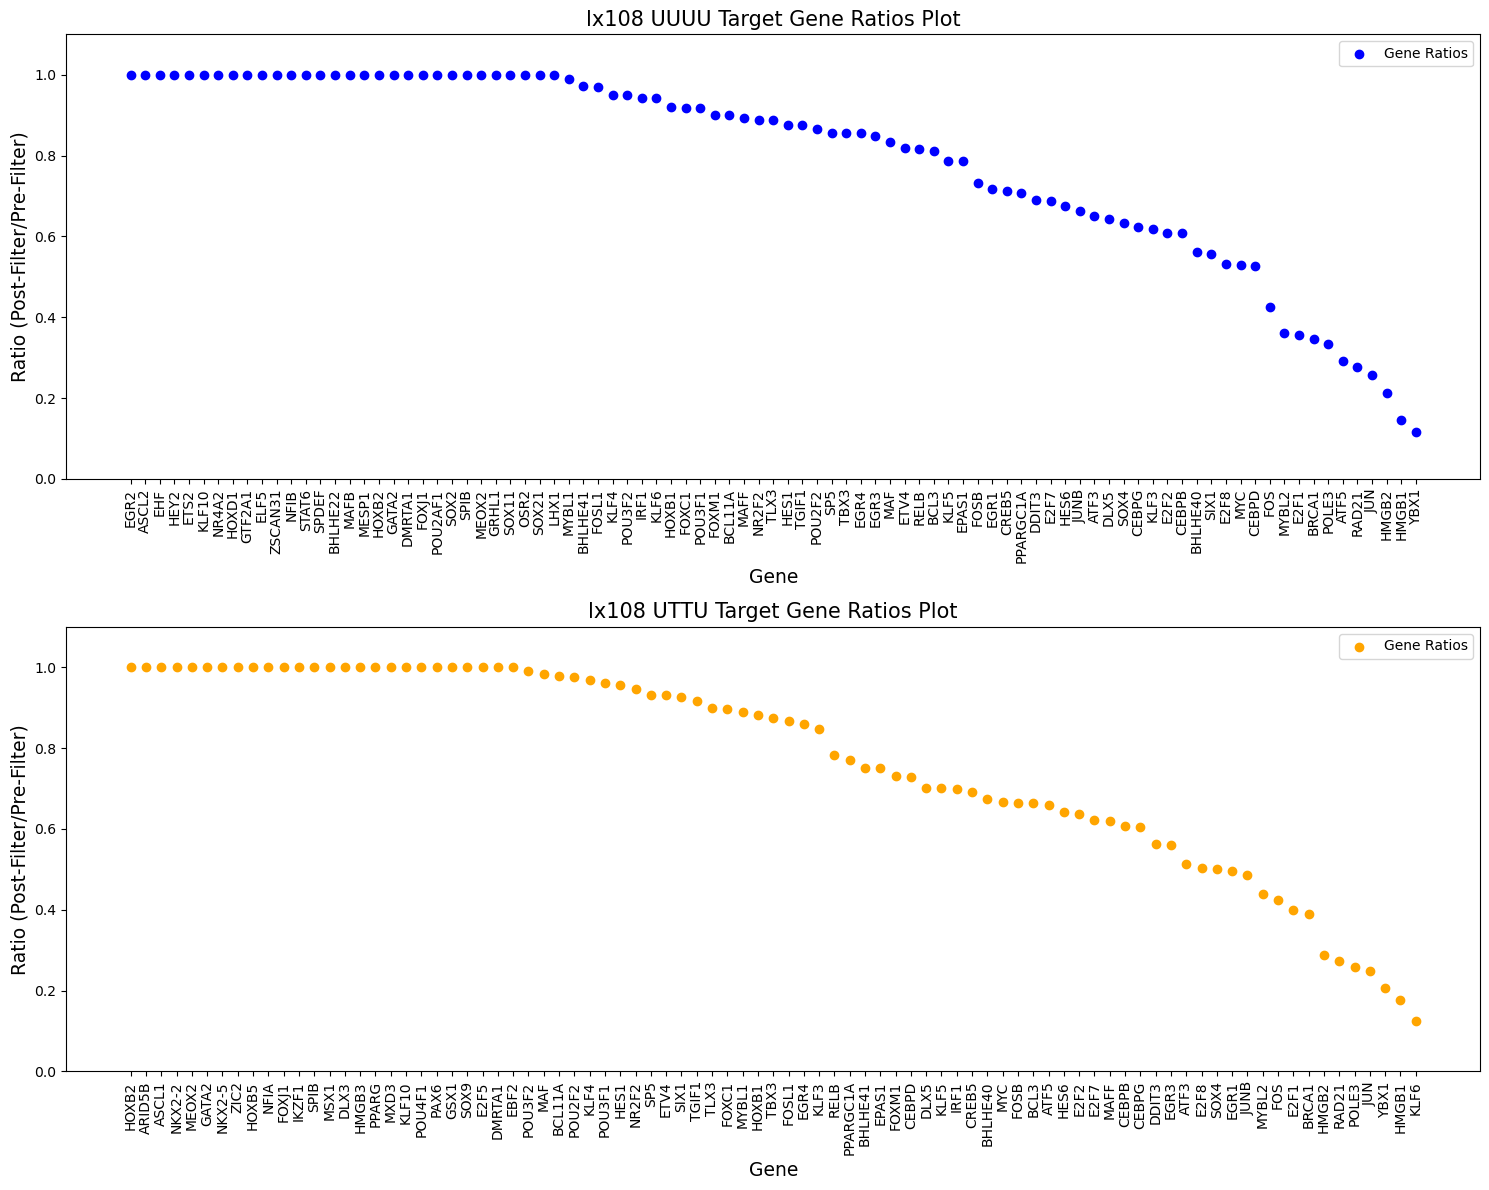

In [225]:
#STEP 8: visualizing the ratios

sorted_regulon1_ratio = dict(sorted(regulon1_ratio.items(), key=lambda item: item[1], reverse=True))
#ratio_plot(sorted_regulon1_ratio, DATASET_ID1, state1)

sorted_regulon2_ratio = dict(sorted(regulon2_ratio.items(), key=lambda item: item[1], reverse=True))
#ratio_plot(sorted_regulon2_ratio, DATASET_ID2, state2)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Plot the first ratio_plot on the first subplot
ax1 = fig.add_subplot(2, 1, 1)
ratio_plot(sorted_regulon1_ratio, DATASET_ID1, state1, 'blue')
ax1.set_title('{} {} Target Gene Ratios Plot'.format(DATASET_ID1, state1), fontsize = 15)

# Plot the second ratio_plot on the second subplot
ax2 = fig.add_subplot(2, 1, 2)
ratio_plot(sorted_regulon2_ratio, DATASET_ID2, state2, 'orange')
ax2.set_title('{} {} Target Gene Ratios Plot'.format(DATASET_ID2, state2), fontsize = 15)

# Adjust layout and save the figure as PNG
plt.tight_layout()
FIGURE_NAME = os.path.join(FIGURE_FOLDERNAME, "{}.{}.{}_vs_{}.{}.{}_ratio.scatter.png".format(DATASET_ID1, state1, frac_cells1, DATASET_ID2, state2, frac_cells2))
plt.savefig(FIGURE_NAME)
print("Successful Writing:",FIGURE_NAME)

plt.show()



In [202]:
# Sanity check: ratio check for both: greater than 0.35

for tf in sorted_regulon1_ratio:
    if tf in sorted_regulon2_ratio:
        if abs(sorted_regulon1_ratio[tf] - sorted_regulon2_ratio[tf]) > 0.30:
            print(tf, '1: ', sorted_regulon1_ratio[tf], '2: ', sorted_regulon2_ratio[tf])
            print('Pre-common edge filer: File 1 tf size = ', regulon1_predict[tf], 'File 2 tf size = ', regulon2_predict[tf], '\n')

KLF6 1:  0.9426229508196722 2:  0.125
Pre-common edge filer: File 1 tf size =  122 File 2 tf size =  8 

SIX1 1:  0.5555555555555556 2:  0.9272727272727272
Pre-common edge filer: File 1 tf size =  18 File 2 tf size =  110 

ATF5 1:  0.2916666666666667 2:  0.66
Pre-common edge filer: File 1 tf size =  48 File 2 tf size =  100 



There are cases where the difference between these two ratio are very big but that is due to one regulon just being a lot bigger, having more targets originally, in one state than the other, so 1/7, vs 1/99 as common edge would be enough to show drastic difference in ratio.

In [226]:
# STEP 9: Making regulatory networks for only regulons that have a ratio greater than threshould



     Regulon_Name Transcription_Factor Target_Gene        Weight  Rank_Norm
0         EGR2(+)                 EGR2      KCTD12  1.558141e+00   0.567568
1         EGR2(+)                 EGR2        FOSB  2.578752e+00   0.702703
2         EGR2(+)                 EGR2       ACTG1  1.162556e+00   0.513514
3         EGR2(+)                 EGR2       INSM1  2.510736e+00   0.675676
4         EGR2(+)                 EGR2        MCL1  3.259758e+00   0.810811
...           ...                  ...         ...           ...        ...
6552     POLE3(+)                POLE3        XKR4  7.346194e-07   0.003699
6553     POLE3(+)                POLE3      KLHL41  7.881362e-01   0.172626
6554     POLE3(+)                POLE3        PGM5  2.424873e-01   0.057953
6555     POLE3(+)                POLE3       CCL19  1.127729e+00   0.277435
6556     POLE3(+)                POLE3        CNR2  7.793532e-01   0.168927

[6557 rows x 5 columns]
